# Mission Analysis and Orbital Mechanics Assignment - Exercise 2

In [12]:
import numpy as np
from constants import *
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

X = [
    x
    y
    z
    x_dot
    y_dot
    z_dot
]

X_dot = [
    x_dot
    y_dot
    z_dot
    - miu * x / sqrt(x²+y²+z²)³
    - miu * y / sqrt(x²+y²+z²)³
    - miu * z / sqrt(x²+y²+z²)³
]

In [13]:
def twobody(_, X):
    return np.concatenate((X[3:], - G_EARTH * X[:3] / np.power(np.linalg.norm(X[:3]), 3)))

r0 = np.array([7115.804, 3391.696, 3492.221])
v0 = np.array([-3.762, 4.063, 4.184])

X0 = np.concatenate((r0, v0))

ts = np.arange(0, 3600 * 24, 10)

sol = solve_ivp(twobody, [0, np.max(ts)], X0, t_eval=ts, rtol=1e-12, atol=1e-12, vectorized=True)
pos = sol.y[:3,:]
vels = sol.y[3:,:]

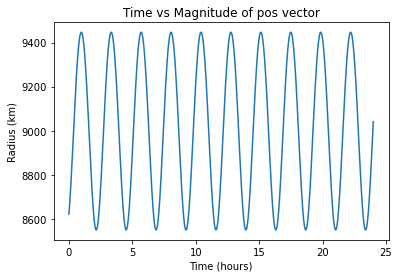

In [14]:
# time vs magnitude of the position vector
plt.plot(ts / 3600.0, np.linalg.norm(pos, axis=0))
plt.xlabel("Time (hours)")
plt.ylabel("Radius (km)")
plt.title("Time vs Magnitude of pos vector")
plt.show()

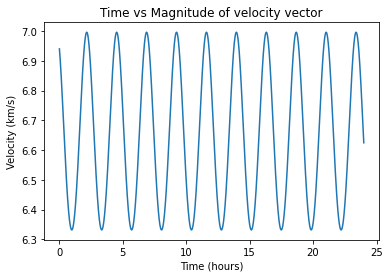

In [15]:
# time vs magnitude of the velocity vector
plt.plot(ts / 3600.0, np.linalg.norm(vels, axis=0))
plt.xlabel("Time (hours)")
plt.ylabel("Velocity (km/s)")
plt.title("Time vs Magnitude of velocity vector")
plt.show()

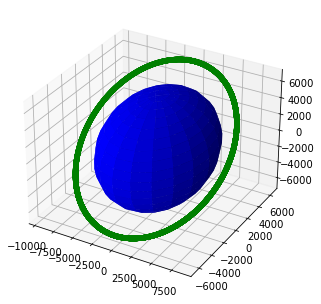

In [16]:
# plot
fig = plt.figure()
ax = axes3d.Axes3D(fig)
ax.scatter(*pos, color='green')

# draw earth
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
x = R_EARTH * np.cos(u) * np.sin(v)
y = R_EARTH * np.sin(u) * np.sin(v)
z = R_EARTH * np.cos(v)
ax.plot_surface(x, y, z, color="b")

plt.show()

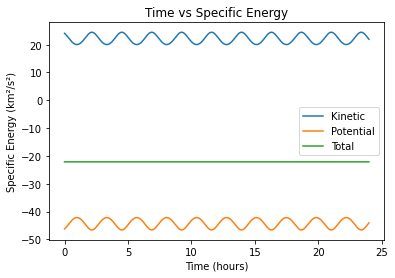

In [17]:
# time vs specific energies
# kinetic energy: 0.5 * v²
kinetic = 0.5 * np.power(np.linalg.norm(vels, axis=0), 2)
# potential energy: - g_param/r
potential = - G_EARTH / np.linalg.norm(pos, axis=0)

plt.plot(ts / 3600.0, kinetic)
plt.plot(ts / 3600.0, potential)
plt.plot(ts / 3600.0, kinetic + potential)
plt.legend(labels=('Kinetic', 'Potential', 'Total'))
plt.xlabel("Time (hours)")
plt.ylabel("Specific Energy (km²/s²)")
plt.title("Time vs Specific Energy")
plt.show()

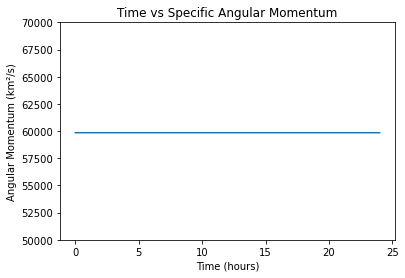

In [23]:
# time vs specific angular momentum
angular_momentum = np.linalg.norm(np.cross(pos, vels, axis=0), axis=0)

plt.plot(ts / 3600.0, angular_momentum)
plt.xlabel("Time (hours)")
plt.ylabel("Angular Momentum (km²/s)")
plt.title("Time vs Specific Angular Momentum")
plt.ylim((50000, 70000))
plt.show()

## Exercise 2 e)

In [19]:
r0 = np.array([0, 0, 8550])
v0 = np.array([0, -7.0, 0])

X0 = np.concatenate((r0, v0))

ts = np.arange(0, 3600 * 24, 10)

sol = solve_ivp(twobody, [0, np.max(ts)], X0, t_eval=ts, rtol=1e-12, atol=1e-12, vectorized=True)
pos = sol.y[:3,:]
vels = sol.y[3:,:]

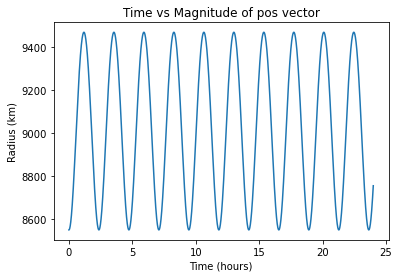

In [20]:
# time vs magnitude of the position vector
plt.plot(ts / 3600.0, np.linalg.norm(pos, axis=0))
plt.xlabel("Time (hours)")
plt.ylabel("Radius (km)")
plt.title("Time vs Magnitude of pos vector")
plt.show()

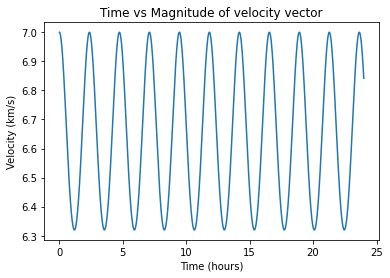

In [21]:
# time vs magnitude of the velocity vector
plt.plot(ts / 3600.0, np.linalg.norm(vels, axis=0))
plt.xlabel("Time (hours)")
plt.ylabel("Velocity (km/s)")
plt.title("Time vs Magnitude of velocity vector")
plt.show()

In [32]:
## calculate a
# specific energy = kinetic energy + potential energy: 0.5 * v²
spec_energy = 0.5 * np.power(np.linalg.norm(vels, axis=0), 2) - G_EARTH / np.linalg.norm(pos, axis=0)
# ε = −μ/(2a) => a = -μ/(2ε)
a = np.average(- G_EARTH / (2 * spec_energy))
print(f"{a=:.3f} km")

## calculate inclination
angular_momentum = np.average(np.cross(pos, vels, axis=0), axis=1)
z = np.array((0, 0, 1))
i = np.degrees(np.arccos(np.dot(angular_momentum, z) / np.linalg.norm(angular_momentum)))
print(f"{i=} degrees")

## eccentricity
e = np.sqrt(1 - np.power(np.linalg.norm(angular_momentum), 2) / (G_EARTH * a))
print(f"{e=:.3f}")

## calculate period
period = 2 * np.pi * np.sqrt(np.power(a, 3) / G_EARTH) / 3600.0
print(f"{period=:.5f} hours")

a=9009.993 km
i=90.0 degrees
e=0.051
period=2.36426 hours
